In [1]:
## Importing data handeling libraries 

import pandas as pd 
import numpy as np 
from collections import OrderedDict

## Machine Learning , Model importing library 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


## importing the KNNimputer class

from sklearn.impute import KNNImputer


## Data visualisation libraries 

import matplotlib.pyplot as plt 
import seaborn as sns 

## importing library to stop warnings

import warnings
warnings.filterwarnings ("ignore") 

## Creating DataFrame 

In [2]:
df = pd.read_csv("Abhudaya_dummy.csv")
df.head() 

,Cust No.,First Name,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,1,Walter,Hargrave,619,France,Female,42,2.0,NaN,1.0,Yes,Yes,101349,1
1,2,Daniel,Hill,608,Spain,Female,41,1.0,83807.86,1.0,No,Yes,112543,0
2,3,Melissa,Onio,502,France,Female,42,8.0,159660.80,3.0,Yes,No,113932,1
3,4,Miley,Boni,699,France,Female,39,1.0,NaN,2.0,No,No,93827,0
4,5,James,Mitchell,850,Spain,Female,43,2.0,125510.82,1.0,Yes,Yes,79084,0


In [3]:
df.drop(["Cust No.","First Name","Surname"],axis=1,inplace=True)
df.head() 

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,619,France,Female,42,2.0,NaN,1.0,Yes,Yes,101349,1
1,608,Spain,Female,41,1.0,83807.86,1.0,No,Yes,112543,0
2,502,France,Female,42,8.0,159660.80,3.0,Yes,No,113932,1
3,699,France,Female,39,1.0,NaN,2.0,No,No,93827,0
4,850,Spain,Female,43,2.0,125510.82,1.0,Yes,Yes,79084,0


## Data PreProcessing 

In [4]:
df.isna().sum() 

Credit Score          0
Geography            72
Gender               68
Age                   0
Tenure               18
Balance            3620
Num Of Policies     167
Credit Card           0
Active Member         0
Salary                0
Exited                0
dtype: int64

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit Score     10071 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           10003 non-null  object 
 3   Age              10071 non-null  int64  
 4   Tenure           10053 non-null  float64
 5   Balance          6451 non-null   float64
 6   Num Of Policies  9904 non-null   float64
 7   Credit Card      10071 non-null  object 
 8   Active Member    10071 non-null  object 
 9   Salary           10071 non-null  int64  
 10  Exited           10071 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 865.6+ KB


In [6]:
## around 33% of data in "balance" column is missing we can not 
## simply drop those null values in this case to do further process 
## we need to impute those values by using appropriate methods
### other than balance column if we consider "num of policies" Or "Geography" column it consist around 1.4 % null values 
### We can simply drop them 

In [7]:
new_df = df 
new_df = new_df[new_df['Geography'].isnull()==False] 
new_df = new_df[new_df['Num Of Policies'].isnull()==False] 

In [8]:
df = new_df
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9832 entries, 0 to 10069
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit Score     9832 non-null   int64  
 1   Geography        9832 non-null   object 
 2   Gender           9771 non-null   object 
 3   Age              9832 non-null   int64  
 4   Tenure           9828 non-null   float64
 5   Balance          6311 non-null   float64
 6   Num Of Policies  9832 non-null   float64
 7   Credit Card      9832 non-null   object 
 8   Active Member    9832 non-null   object 
 9   Salary           9832 non-null   int64  
 10  Exited           9832 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 921.8+ KB


In [9]:
## We lost around 3% of data to remove null values 
## from all the features but dropping null values from "balance" will not be appropriate 
## hence we are going to impute values where balance is null

In [10]:
## we would do null value impution by two different methods one is by using linear regression 
## and other is by using KNN imputation and we will check accuracy for both the methods 
## whichever will work fine we will go with that method. 

## First method for null value imputation - BY using Linear Regression 

In [11]:
## To do Linear regression imputation we will create two different dataframes by using above dataframe 
## In first data frame we will consider "balance true values" and we will use that datframe to train the model
## In second data frame we will consider "balance false values" and we will use that datframe to predict missing values.

### Preprocessing Data to use it for null value imputation by using Linear regrssion

In [12]:
le = LabelEncoder() 
for i in df.columns:
    if df[i].dtype == "O" :
        df[i] = le.fit_transform(df[i])  

In [13]:
## As we are using linear regression just going through discriptive stats 

In [14]:
df

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num Of Policies,Credit Card,Active Member,Salary,Exited
0,619,0,0,42,2.0,NaN,1.0,1,1,101349,1
1,608,2,0,41,1.0,83807.86,1.0,0,1,112543,0
2,502,0,0,42,8.0,159660.80,3.0,1,0,113932,1
3,699,0,0,39,1.0,NaN,2.0,0,0,93827,0
4,850,2,0,43,2.0,125510.82,1.0,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...
10064,711,2,1,86,1.0,161425.00,2.0,1,0,51518,1
10065,447,0,1,31,8.0,79591.00,3.0,0,1,159857,0
10066,777,0,0,35,3.0,80701.00,2.0,1,1,156120,0
10068,450,0,1,60,9.0,1053.00,4.0,1,1,86961,0


In [15]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].describe()

,Credit Score,Age,Tenure,Balance,Num Of Policies,Salary
count,9832.000000,9832.000000,9828.000000,6311.000000,9832.000000,9832.000000
mean,650.292921,39.007018,5.008140,119907.324999,1.531428,100133.187449
std,96.908705,10.600976,2.895932,30562.821953,0.591560,57560.414197
min,350.000000,18.000000,0.000000,1053.000000,1.000000,12.000000
25%,583.750000,32.000000,2.000000,100116.745000,1.000000,50974.500000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,100238.000000
75%,718.000000,44.000000,7.000000,139642.525000,2.000000,149458.250000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.000000


In [16]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].skew() 

Credit Score      -0.076301
Age                1.042858
Tenure             0.011162
Balance            0.038253
Num Of Policies    0.822019
Salary            -0.000096
dtype: float64

In [17]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].kurt() 

Credit Score      -0.426717
Age                1.549701
Tenure            -1.165715
Balance            0.365265
Num Of Policies    0.815534
Salary            -1.183271
dtype: float64

In [18]:
df[["Credit Score","Age","Tenure","Balance","Num Of Policies","Salary"]].corr()  

,Credit Score,Age,Tenure,Balance,Num Of Policies,Salary
Credit Score,1.000000,-0.005140,-0.001289,-0.009320,0.008193,0.000862
Age,-0.005140,1.000000,-0.010486,-0.012861,-0.014252,-0.008129
Tenure,-0.001289,-0.010486,1.000000,0.002718,0.010364,0.008331
Balance,-0.009320,-0.012861,0.002718,1.000000,0.005639,-0.001756
Num Of Policies,0.008193,-0.014252,0.010364,0.005639,1.000000,0.013025
Salary,0.000862,-0.008129,0.008331,-0.001756,0.013025,1.000000


### No linear relationship is there in "Balance" and other coulmns that we are suppose to use as an independant variables
### Data is not distributed normally 
### two important considerations of Linear regression are not being followed by data 
### Imputation By using linear regression will not be a good choice in any condition.

## Second method for null value imputation - BY using KNN Imputation 

In [19]:
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(df) 

In [20]:
df = pd.DataFrame(df) 

In [21]:
df["Credit_Score"] = df.iloc[0:,0]
df["Geography"] = df.iloc[0:,1]
df["Gender"] = df.iloc[0:,2]
df["Age"] = df.iloc[0:,3]
df["Tenure"] = df.iloc[0:,4]
df["Balance"] = df.iloc[0:,5]
df["Num_Of_Policies"] = df.iloc[0:,6]
df["Credit_Card"] = df.iloc[0:,7]
df["Active_Member"] = df.iloc[0:,8]
df["Salary"] = df.iloc[0:,9]
df["Exited"] = df.iloc[0:,10] 

In [22]:
df = df.iloc[0:,11:]
df

,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Policies,Credit_Card,Active_Member,Salary,Exited
0,619.0,0.0,0.0,42.0,2.0,144321.21,1.0,1.0,1.0,101349.0,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112543.0,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113932.0,1.0
3,699.0,0.0,0.0,39.0,1.0,124499.37,2.0,0.0,0.0,93827.0,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9827,711.0,2.0,1.0,86.0,1.0,161425.00,2.0,1.0,0.0,51518.0,1.0
9828,447.0,0.0,1.0,31.0,8.0,79591.00,3.0,0.0,1.0,159857.0,0.0
9829,777.0,0.0,0.0,35.0,3.0,80701.00,2.0,1.0,1.0,156120.0,0.0
9830,450.0,0.0,1.0,60.0,9.0,1053.00,4.0,1.0,1.0,86961.0,0.0


In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit_Score     9832 non-null   float64
 1   Geography        9832 non-null   float64
 2   Gender           9832 non-null   float64
 3   Age              9832 non-null   float64
 4   Tenure           9832 non-null   float64
 5   Balance          9832 non-null   float64
 6   Num_Of_Policies  9832 non-null   float64
 7   Credit_Card      9832 non-null   float64
 8   Active_Member    9832 non-null   float64
 9   Salary           9832 non-null   float64
 10  Exited           9832 non-null   float64
dtypes: float64(11)
memory usage: 845.1 KB


* This is how we can impute null values by using KNN Imputer 
* instead of using mean or median of the data this type will be more impactfull 
* As here we are using nearest neighbors to predict the null value.

# EDA 

In [24]:
def summary_function(df):

    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result = pd.DataFrame(result)
    
    ##skewness type

    skewtype =[]
    
    for i in result['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result['Skew_Type'] = skewtype
  
    ## Kurtosis Type
    k_type = []
    
    for i in result['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: 
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
             
    result['Kurtosis_Type'] = k_type

   
    #Outlier detection
    
    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result['outlier_comment'] = outlier_comment
    
    result['outlier_percentage'] = outlier_percentage
   
    return result 

In [25]:
summary_function(df) 

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,Credit_Score,9832,350.0,583.750000,650.292921,652.000000,718.0000,850.00,9.391297e+03,96.908705,-0.426717,-0.076301,134.250000,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.206672
1,Geography,9832,0.0,0.000000,0.743897,0.000000,1.0000,2.00,6.832605e-01,0.826596,-1.354255,0.505830,1.000000,Moderately Positively Skewed,Highly Platykurtic Curve,has outliers,0.206672
2,Gender,9832,0.0,0.000000,0.555228,1.000000,1.0000,2.00,2.593847e-01,0.509298,-1.645417,-0.081174,1.000000,Approx Normal Distribution (-ve),Highly Platykurtic Curve,has outliers,0.206672
3,Age,9832,18.0,32.000000,39.007018,37.000000,44.0000,92.00,1.123807e+02,10.600976,1.549701,1.042858,12.000000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.206672
4,Tenure,9832,0.0,2.000000,5.007730,5.000000,7.0000,10.00,8.383828e+00,2.895484,-1.165246,0.011505,5.000000,Approx Normal Distribution (+ve),Highly Platykurtic Curve,has outliers,0.206672
5,Balance,9832,1053.0,103492.438333,119725.604851,119455.953333,135800.3975,250898.09,7.110337e+08,26665.215353,0.942915,0.060879,32307.959167,Approx Normal Distribution (+ve),Moderately Leptokurtic Curve,has outliers,0.206672
6,Num_Of_Policies,9832,1.0,1.000000,1.531428,1.000000,2.0000,4.00,3.499429e-01,0.591560,0.815534,0.822019,1.000000,Moderately Positively Skewed,Moderately Leptokurtic Curve,has outliers,0.206672
7,Credit_Card,9832,0.0,0.000000,0.705248,1.000000,1.0000,1.00,2.078943e-01,0.455954,-1.189369,-0.900485,1.000000,Moderately Negatively Skewed,Highly Platykurtic Curve,has outliers,0.206672
8,Active_Member,9832,0.0,0.000000,0.514341,1.000000,1.0000,1.00,2.498197e-01,0.499820,-1.997112,-0.057396,1.000000,Approx Normal Distribution (-ve),Highly Platykurtic Curve,has outliers,0.206672
9,Salary,9832,12.0,50974.500000,100133.187449,100238.000000,149458.2500,199992.00,3.313201e+09,57560.414197,-1.183271,-0.000096,98483.750000,Approx Normal Distribution (-ve),Highly Platykurtic Curve,has outliers,0.206672


## Some Important observations from by using custom summary function and visualisations are as follows

Text(0, 0.5, 'Count of Credit Score')

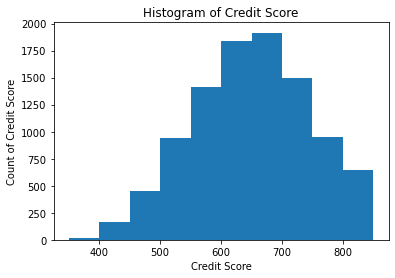

In [26]:
plt.hist(df["Credit_Score"])
plt.title("Histogram of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count of Credit Score")

* Credit score is distributed almost normally at the same time peakedness is also not present in the credit score though mean is not representing the data as well median is somewhat similar to mean so credit score is distributed throughout the range similarly 

<AxesSubplot:ylabel='Geography'>

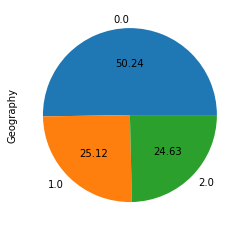

In [27]:
df["Geography"].value_counts().plot(kind="pie",autopct = "%0.2f")

* Around 50 % of clients belongs to same geographical location and total catgories are three other two locations have 25% clients each

<AxesSubplot:ylabel='Gender'>

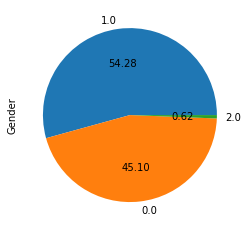

In [28]:
df["Gender"].value_counts().plot(kind="pie",autopct = "%0.2f")

* We have data of 55% male and 45% female clients, we can also so that proportion of male and female clients in bank is somewhat similar

Text(0, 0.5, 'Count of Age')

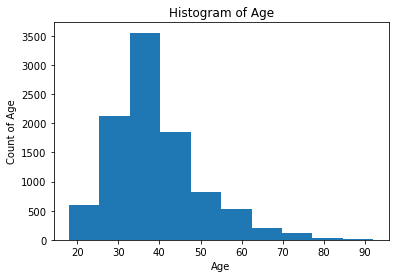

In [29]:
plt.hist(df["Age"])
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count of Age") 

* Great thing is 50% of clients belongs to the range from 32 to 44 which is a good thing as this is the most active category in financial perspective, mean and median are almost similar as well as kurtosis is so high it is highly leptokurtic curve so we can say that mean is definately representing the data. Age is highly positively skewed so we can say that qurtile 3 is very lengthy and only 25% clients belongs to this category from 44-92.

Text(0, 0.5, 'Count of Tenure')

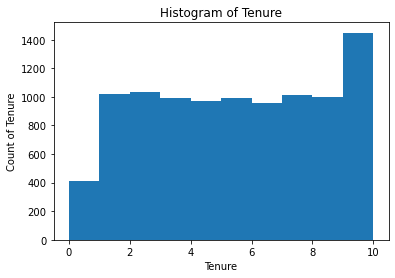

In [30]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count of Tenure") 

* When it comes to tenure it is distributed so normally in the range between 0 to 10. Mean and median are same that is 5 Years and kurtosis is highly platykurtic so mean is not representing the data at all. Inter - Quartile distribution is also similar. All four qurtiles have almost same range that is 2,3,2,3 years. We have clients from 0 to 10 years of tenure having almost similar counts. 

Text(0, 0.5, 'Count of Balance')

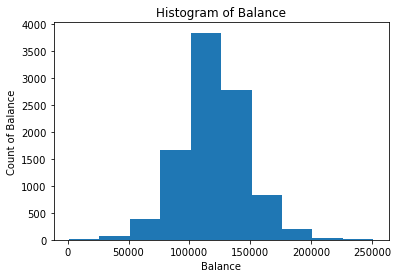

In [31]:
plt.hist(df["Balance"])
plt.title("Histogram of Balance")
plt.xlabel("Balance")
plt.ylabel("Count of Balance") 

* Balance is distributed normally and have leptokuric curve so mean is good it is representing the data. Interqurtile range is very small as compared to minimum and maximum values so there is concentration in balance thats why mean is representing the data. Data is highly concentrated in between inter-quartile range.

<AxesSubplot:>

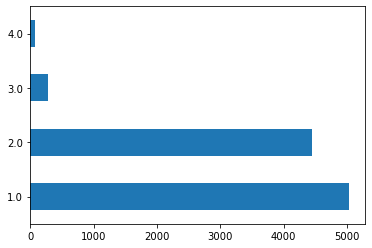

In [32]:
df["Num_Of_Policies"].value_counts().plot(kind="barh") 

* 52 % of peoples have only 1 policy , 45% peoples have 2 policies,  2.5 % peoples have 3 policies and and only 0.5% have 4 policies need to promote policies throughout various branches.

<AxesSubplot:ylabel='Credit_Card'>

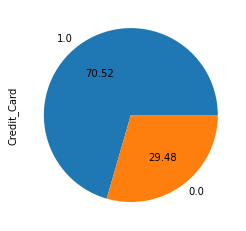

In [33]:
df["Credit_Card"].value_counts().plot(kind="pie",autopct = "%0.2f") 

* Around 70% of clients have credit card which is a great number still there is scope for improvment 

<AxesSubplot:ylabel='Active_Member'>

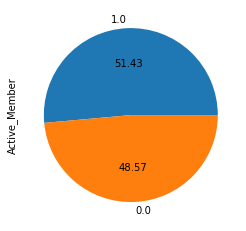

In [34]:
df["Active_Member"].value_counts().plot(kind="pie",autopct = "%0.2f") 

* Out of above available data only 50 % members are active which not a good thing at all. Business improvment and service and support team must have to go in deep to find out reasons as well as to find out remedial actions to improve above numbers. 

Text(0, 0.5, 'Count of Salary')

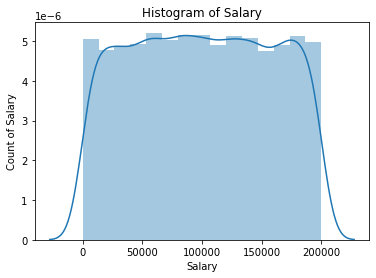

In [35]:
sns.distplot(df["Salary"],bins=15)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Count of Salary") 

* When it comes to salary it is distributed so normally in the range between 0 to 200000. Mean and median are same that is both are around 100000 and kurtosis is moderately platykurtic so mean is not representing the data. Inter - Quartile distribution is also similar. All four qurtiles have almost same range that is around 50000.

In [36]:
df["Exited"].value_counts() 

0.0    7800
1.0    2032
Name: Exited, dtype: int64

## Around 22% of clients has exited from bank which is big number.

## Every feature contains outliers and the % of them are exactly similar with each other so there is a strong possibility that some particular records from the data are noisy 

## Lets visualise outliers by using outlier detection plots 

In [37]:
def outlier_treatment(df,col,method="quartile",strategy = "median"):
    col_data = df[col]
    
    # using quartile method to find outliers 
    
    if method == "quartile":
        q2 = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1 
        lowerlimit = q1 - 1.5*iqr
        upperlimit = q3 + 1.5*iqr
        
     # using std dav method to find outliers 
    
    elif method == "standerd_daviation":
        col_mean = df[col].mean()
        col_std = df[col].std()
        lowerlimit = col_mean - 2*col_std
        upperlimit = col_mean + 2*col_std
        
    else:
        print("Pass a correct method")
        
    # printing outliers 
    
    outliers = df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col]
    outlier_density = round(len(outliers)/len(df),4)
    
    if len(outliers) == 0 :
        print(f"the column {col} has no outliers")
    else:
        print(f"the column {col} has outliers")
        print("the outlier percentage is", outlier_density)
        print("outliers of column are : ")
        display(df[( col_data < lowerlimit ) | (col_data > upperlimit)])
    
    ## replacing outliers 
    if strategy == "median":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].median()
    
    elif strategy == "mean":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].mean() 
 
    else:
        print("Pass a correct strategy")
                      
    return (df)

## ODT plots : Outlier detection plot
* in this we plot three graphs 
* 1 Boxplot for descriptive statistics 
* 2 histogram with outliers 
* 3 histogram without outliers 

In [38]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
    
    # plotting boxplot 
    
    sns.boxplot(df[col],ax=ax1)
    ax1.set_title(col + " Boxplot")
    ax1.set_xlabel("Boxplot")
    ax1.set_ylabel("Values")
    
    # plotting Histogram with outliers 
    
    sns.distplot(df[col],ax=ax2)
    ax2.set_title(col + " Histogram with outliers")
    ax2.set_xlabel("Density")
    ax2.set_ylabel("Values")
    
    
    # plotting Histogram without outliers 
    
    #y = outlier_treatment(df,col)
    
    #sns.distplot(y[col],ax=ax3)
    #ax3.set_title(col + " Histogram without outliers")
   # ax3.set_xlabel("Density")
    #ax3.set_ylabel("Values")

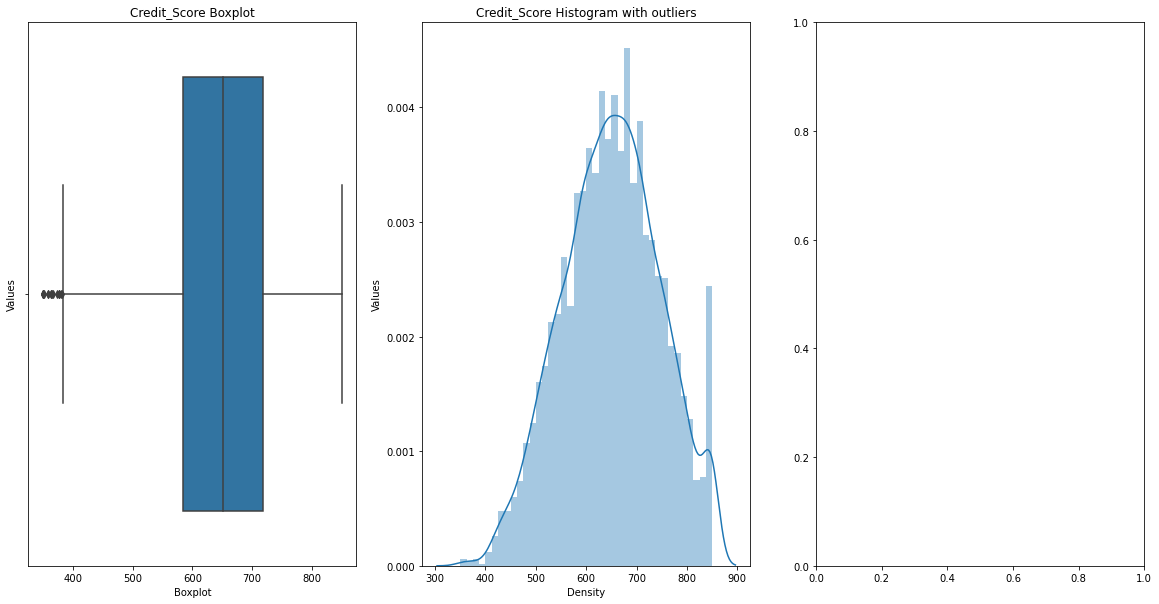

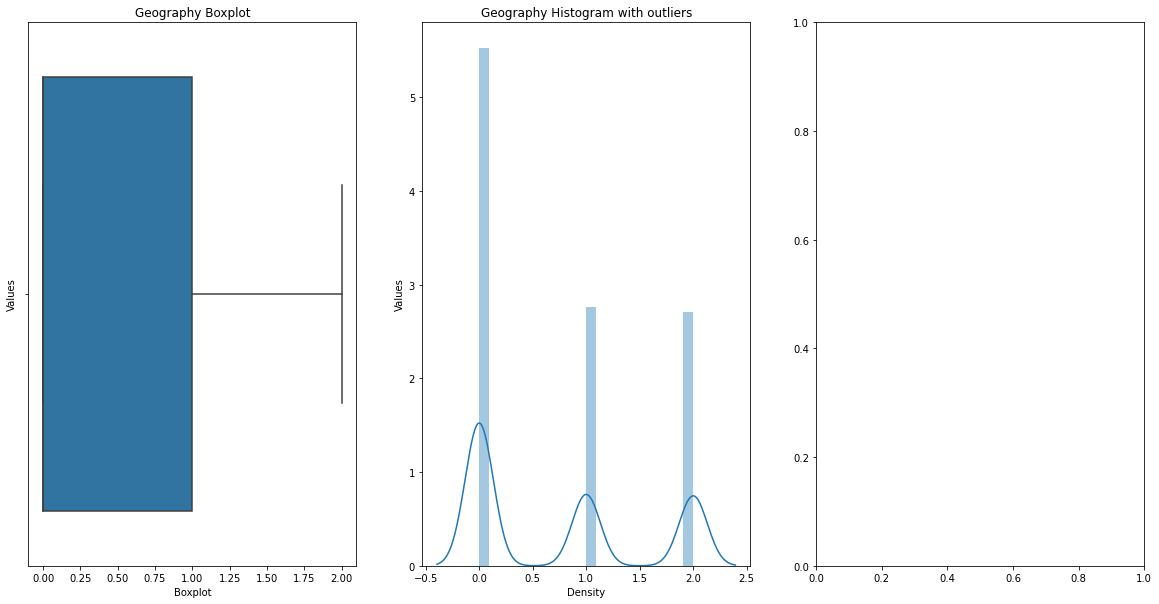

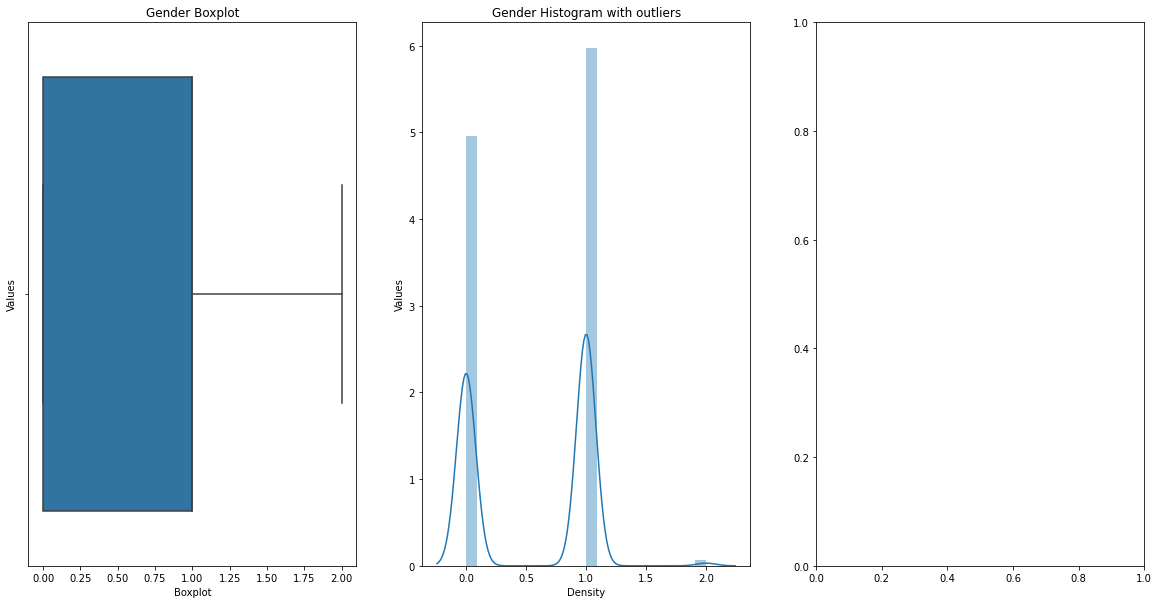

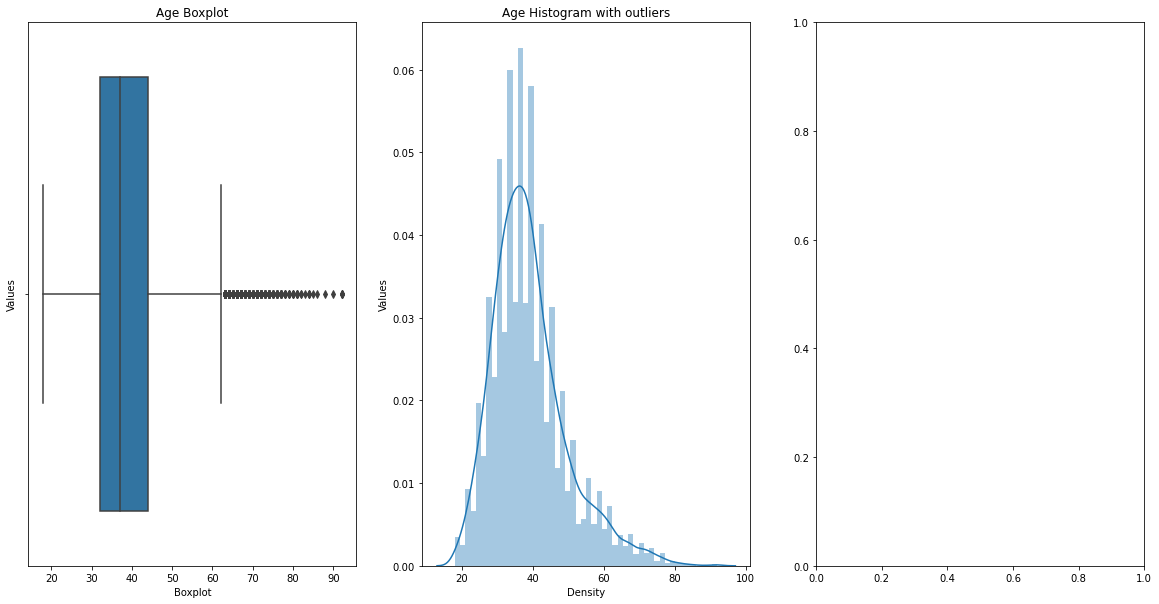

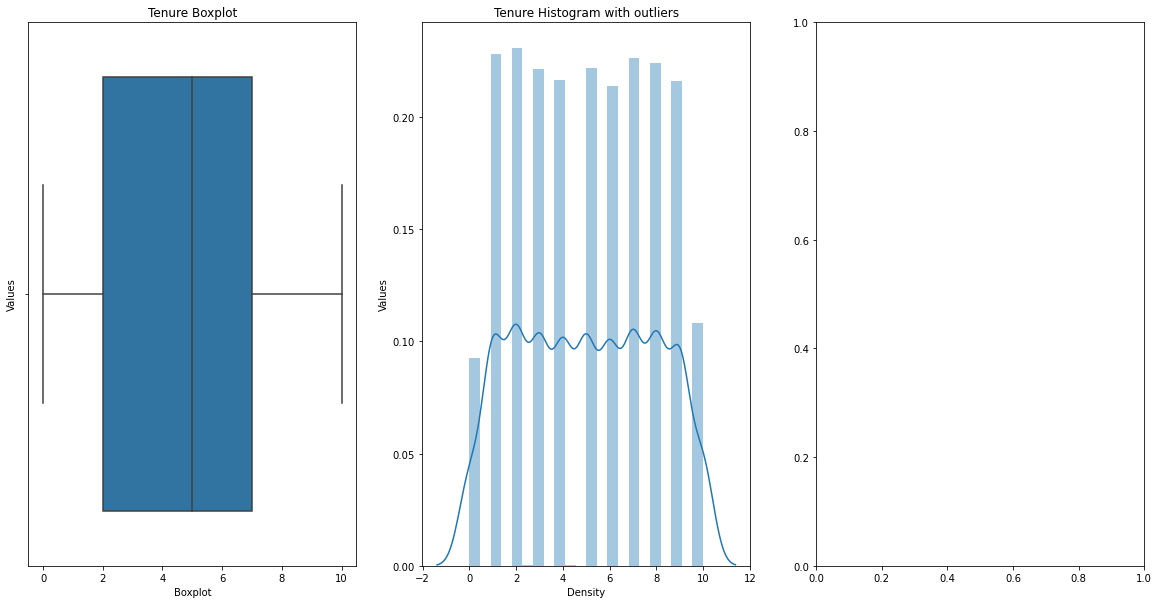

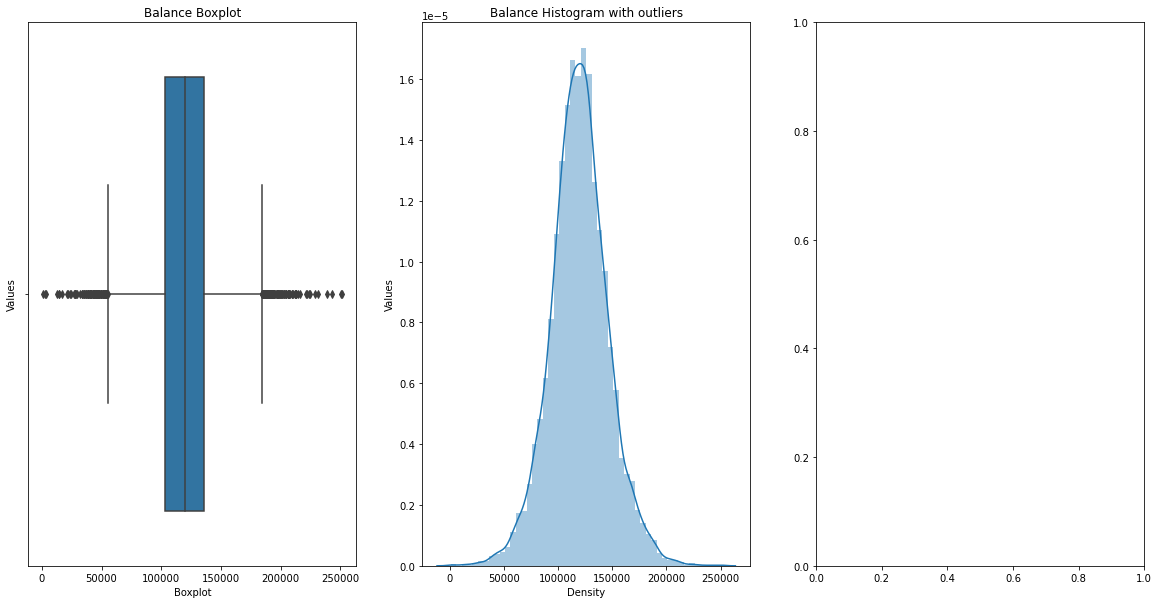

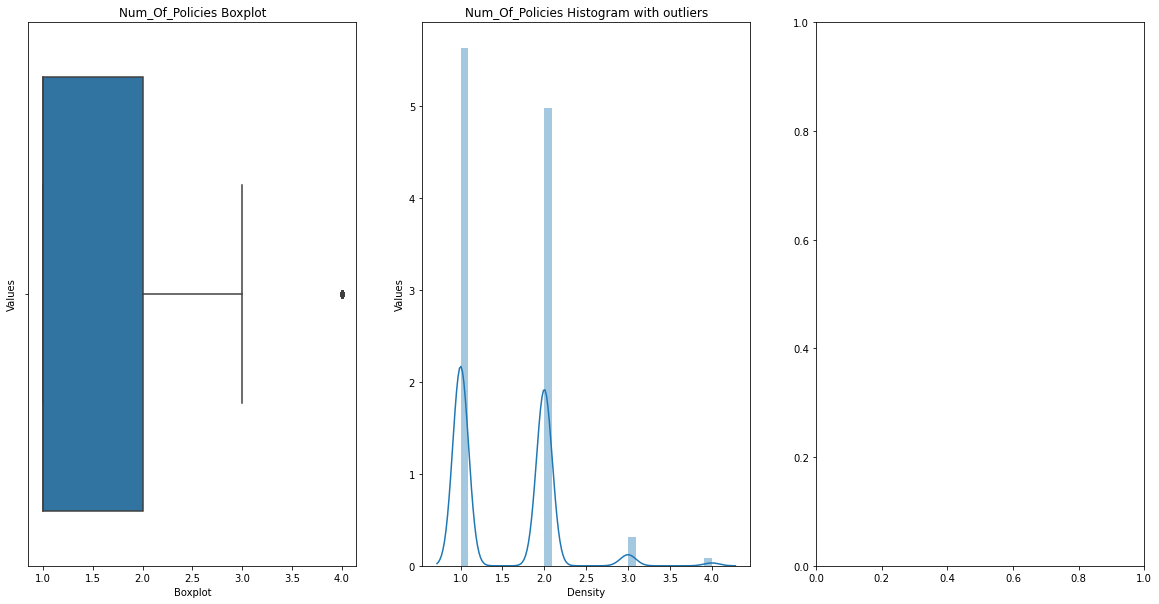

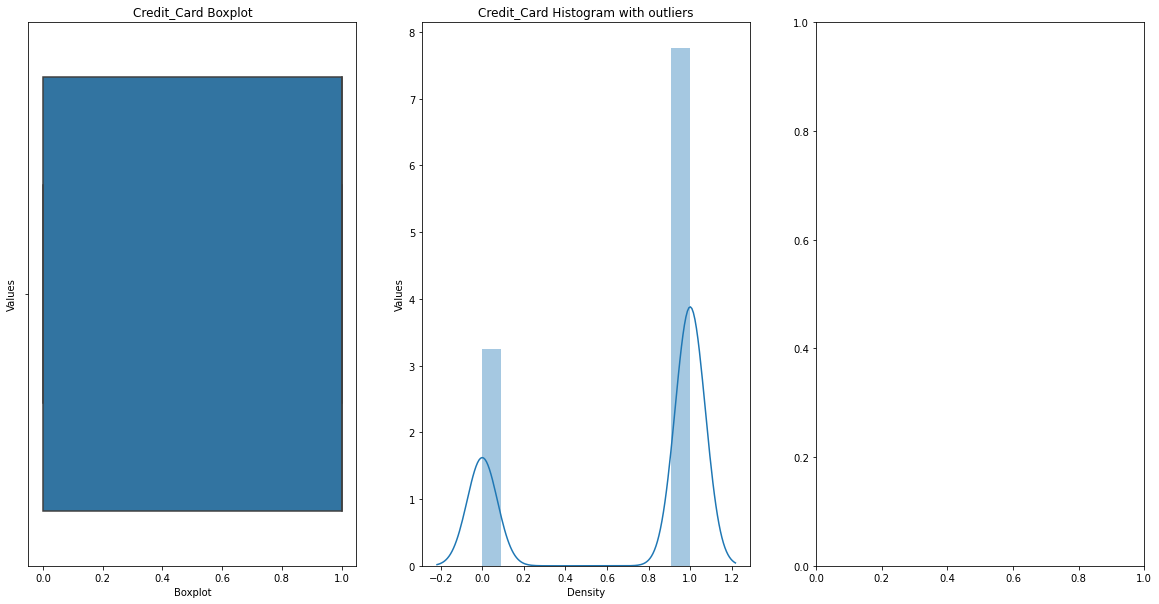

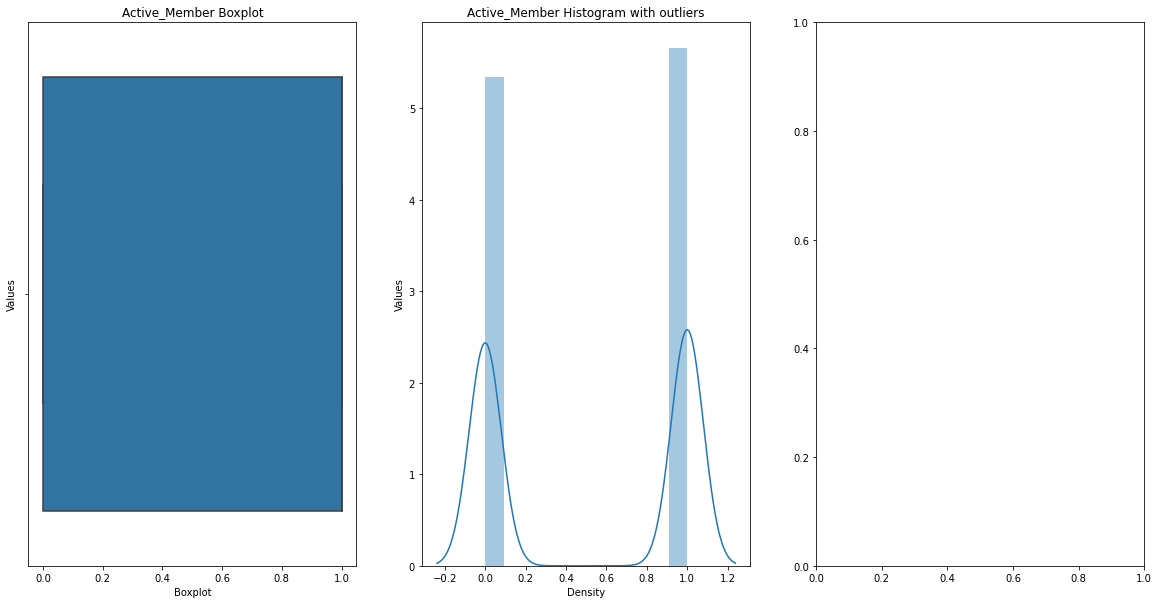

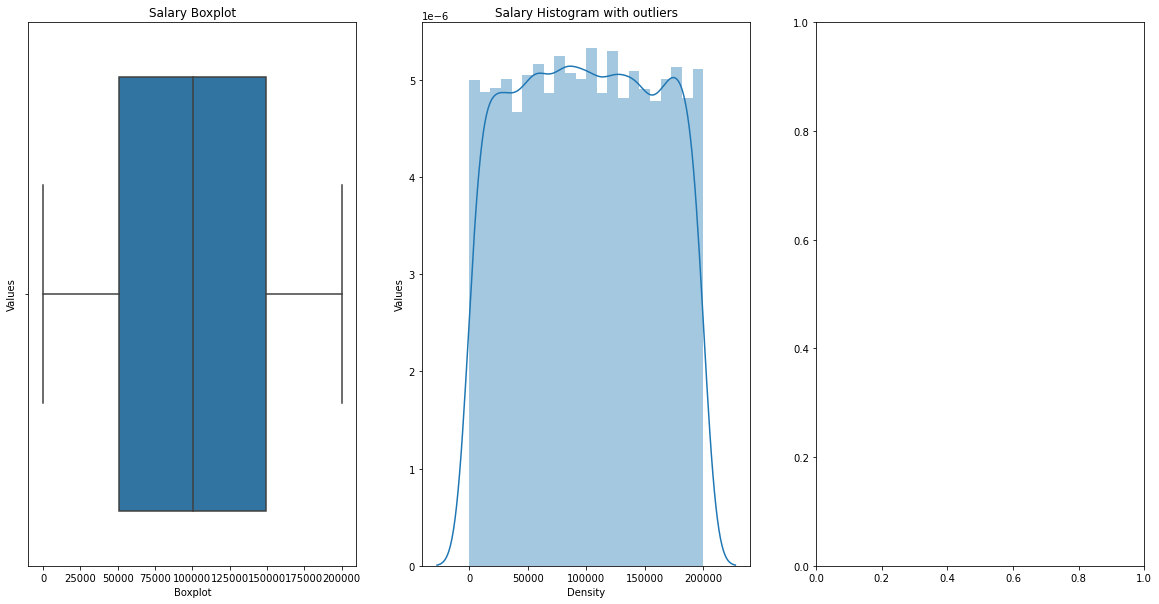

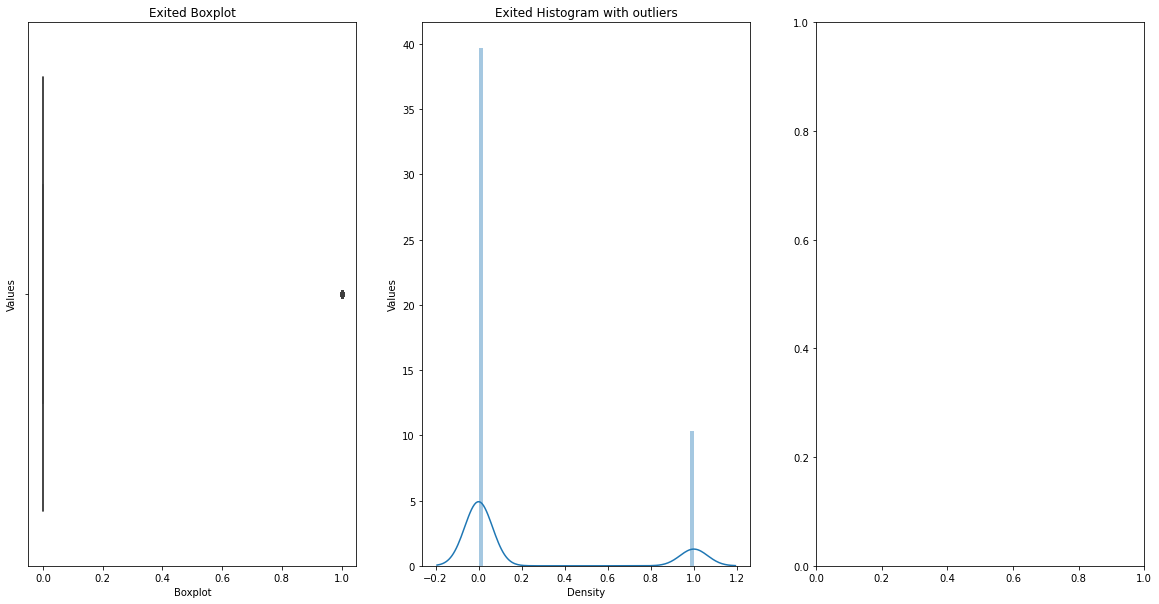

In [39]:
for col in df.columns:
    odt_plot(df,col)

In [40]:
df

,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Policies,Credit_Card,Active_Member,Salary,Exited
0,619.0,0.0,0.0,42.0,2.0,144321.21,1.0,1.0,1.0,101349.0,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112543.0,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113932.0,1.0
3,699.0,0.0,0.0,39.0,1.0,124499.37,2.0,0.0,0.0,93827.0,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9827,711.0,2.0,1.0,86.0,1.0,161425.00,2.0,1.0,0.0,51518.0,1.0
9828,447.0,0.0,1.0,31.0,8.0,79591.00,3.0,0.0,1.0,159857.0,0.0
9829,777.0,0.0,0.0,35.0,3.0,80701.00,2.0,1.0,1.0,156120.0,0.0
9830,450.0,0.0,1.0,60.0,9.0,1053.00,4.0,1.0,1.0,86961.0,0.0


### Not treating outliers as we are working on the target variable in the classification format. 
### so we are going to apply machine learning models which does not get affected by outliers.
### There is issue with logistic regrssion as higher range outliers affect it.
### But in this case we dont have higher range outliers so it is fine to avoid outlier treatment.

## Correlation Plot 

<AxesSubplot:>

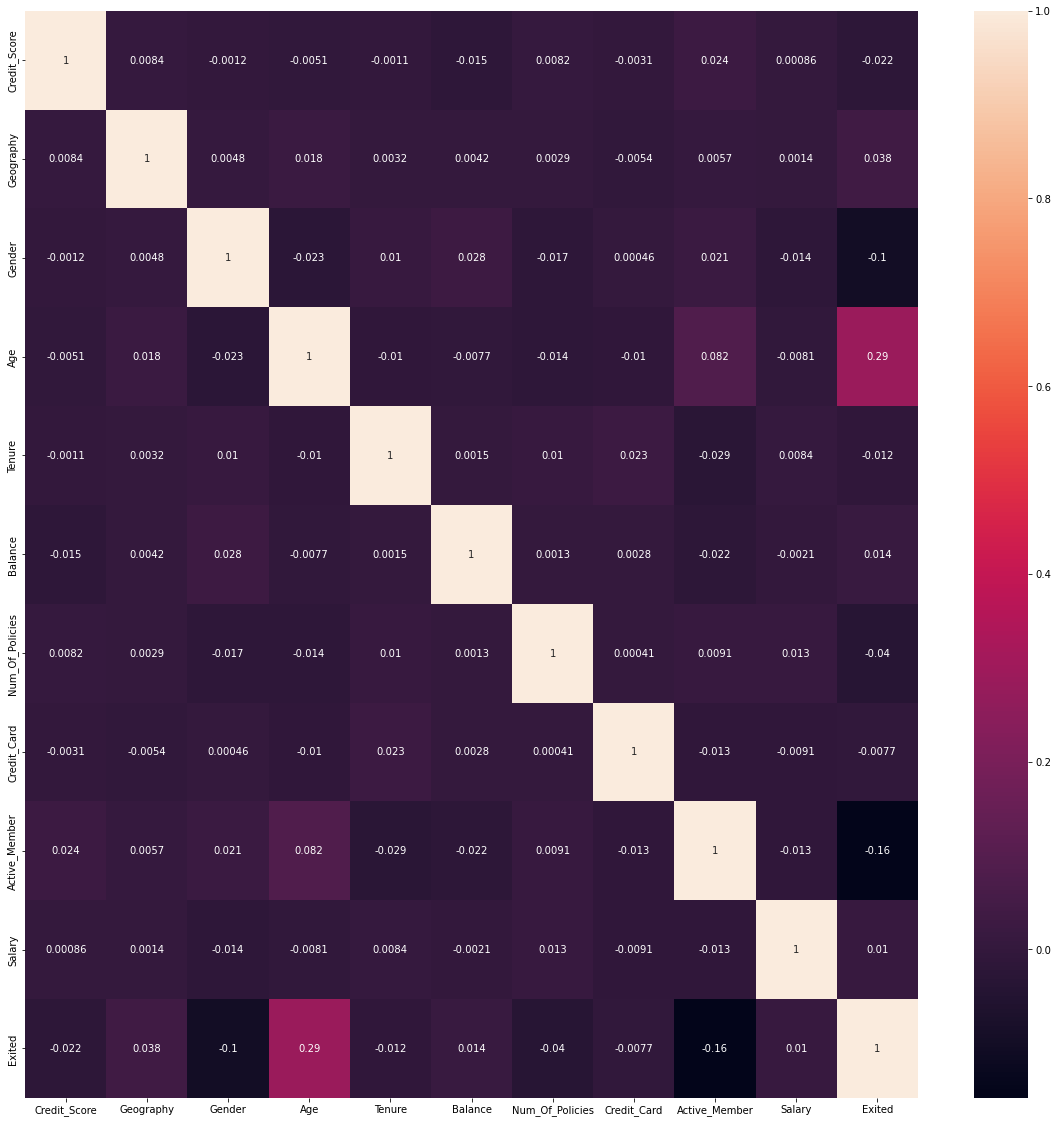

In [41]:
## checking for multi-collinearity

cor = df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True)

* Multi-collinearity is not present in the data 
* Age has a good positive correlation with target variable which is exited 
* Activeness of a person and target variable has week negative correlation
* multicollinearity is not present in the data 

# Model Selection 

* Lets use pairplots for data visualisation and by using them we will try to decide which models will be the best fitting ones for above data.

In [42]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["Exited"],axis=1))

In [43]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns[:-1])  

In [44]:
df_scaled 

,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Policies,Credit_Card,Active_Member,Salary
0,-0.322928,-0.899999,-1.090237,0.282345,-1.038819,0.922432,-0.898396,0.646483,0.971718,0.021123
1,-0.436442,1.519687,-1.090237,0.188009,-1.384202,-1.347057,-0.898396,-1.546831,0.971718,0.215607
2,-1.530311,-0.899999,-1.090237,0.282345,1.033479,1.497727,2.482668,0.646483,-1.029105,0.239740
3,0.502633,-0.899999,-1.090237,-0.000662,-1.384202,0.179035,0.792136,-1.546831,-1.029105,-0.109563
4,2.060880,1.519687,-1.090237,0.376681,-1.038819,0.216968,-0.898396,0.646483,0.971718,-0.365707
...,...,...,...,...,...,...,...,...,...,...
9827,0.626468,1.519687,0.873348,4.433118,-1.384202,1.563892,0.792136,0.646483,-1.029105,-0.844637
9828,-2.097884,-0.899999,0.873348,-0.755348,1.033479,-1.505206,2.482668,-1.546831,0.971718,1.037638
9829,1.307556,-0.899999,-1.090237,-0.378005,-0.693436,-1.463577,0.792136,0.646483,0.971718,0.972711
9830,-2.066926,-0.899999,0.873348,1.980388,1.378862,-4.450691,4.173201,0.646483,0.971718,-0.228853


* Did standardisation of data as some algorithms such as KNN, SVM gets affected due to scales of data.
* Variables with higher scales have more impact on target variables.
* So to avoid such impacts we do standardisation.

# Pair Plot 

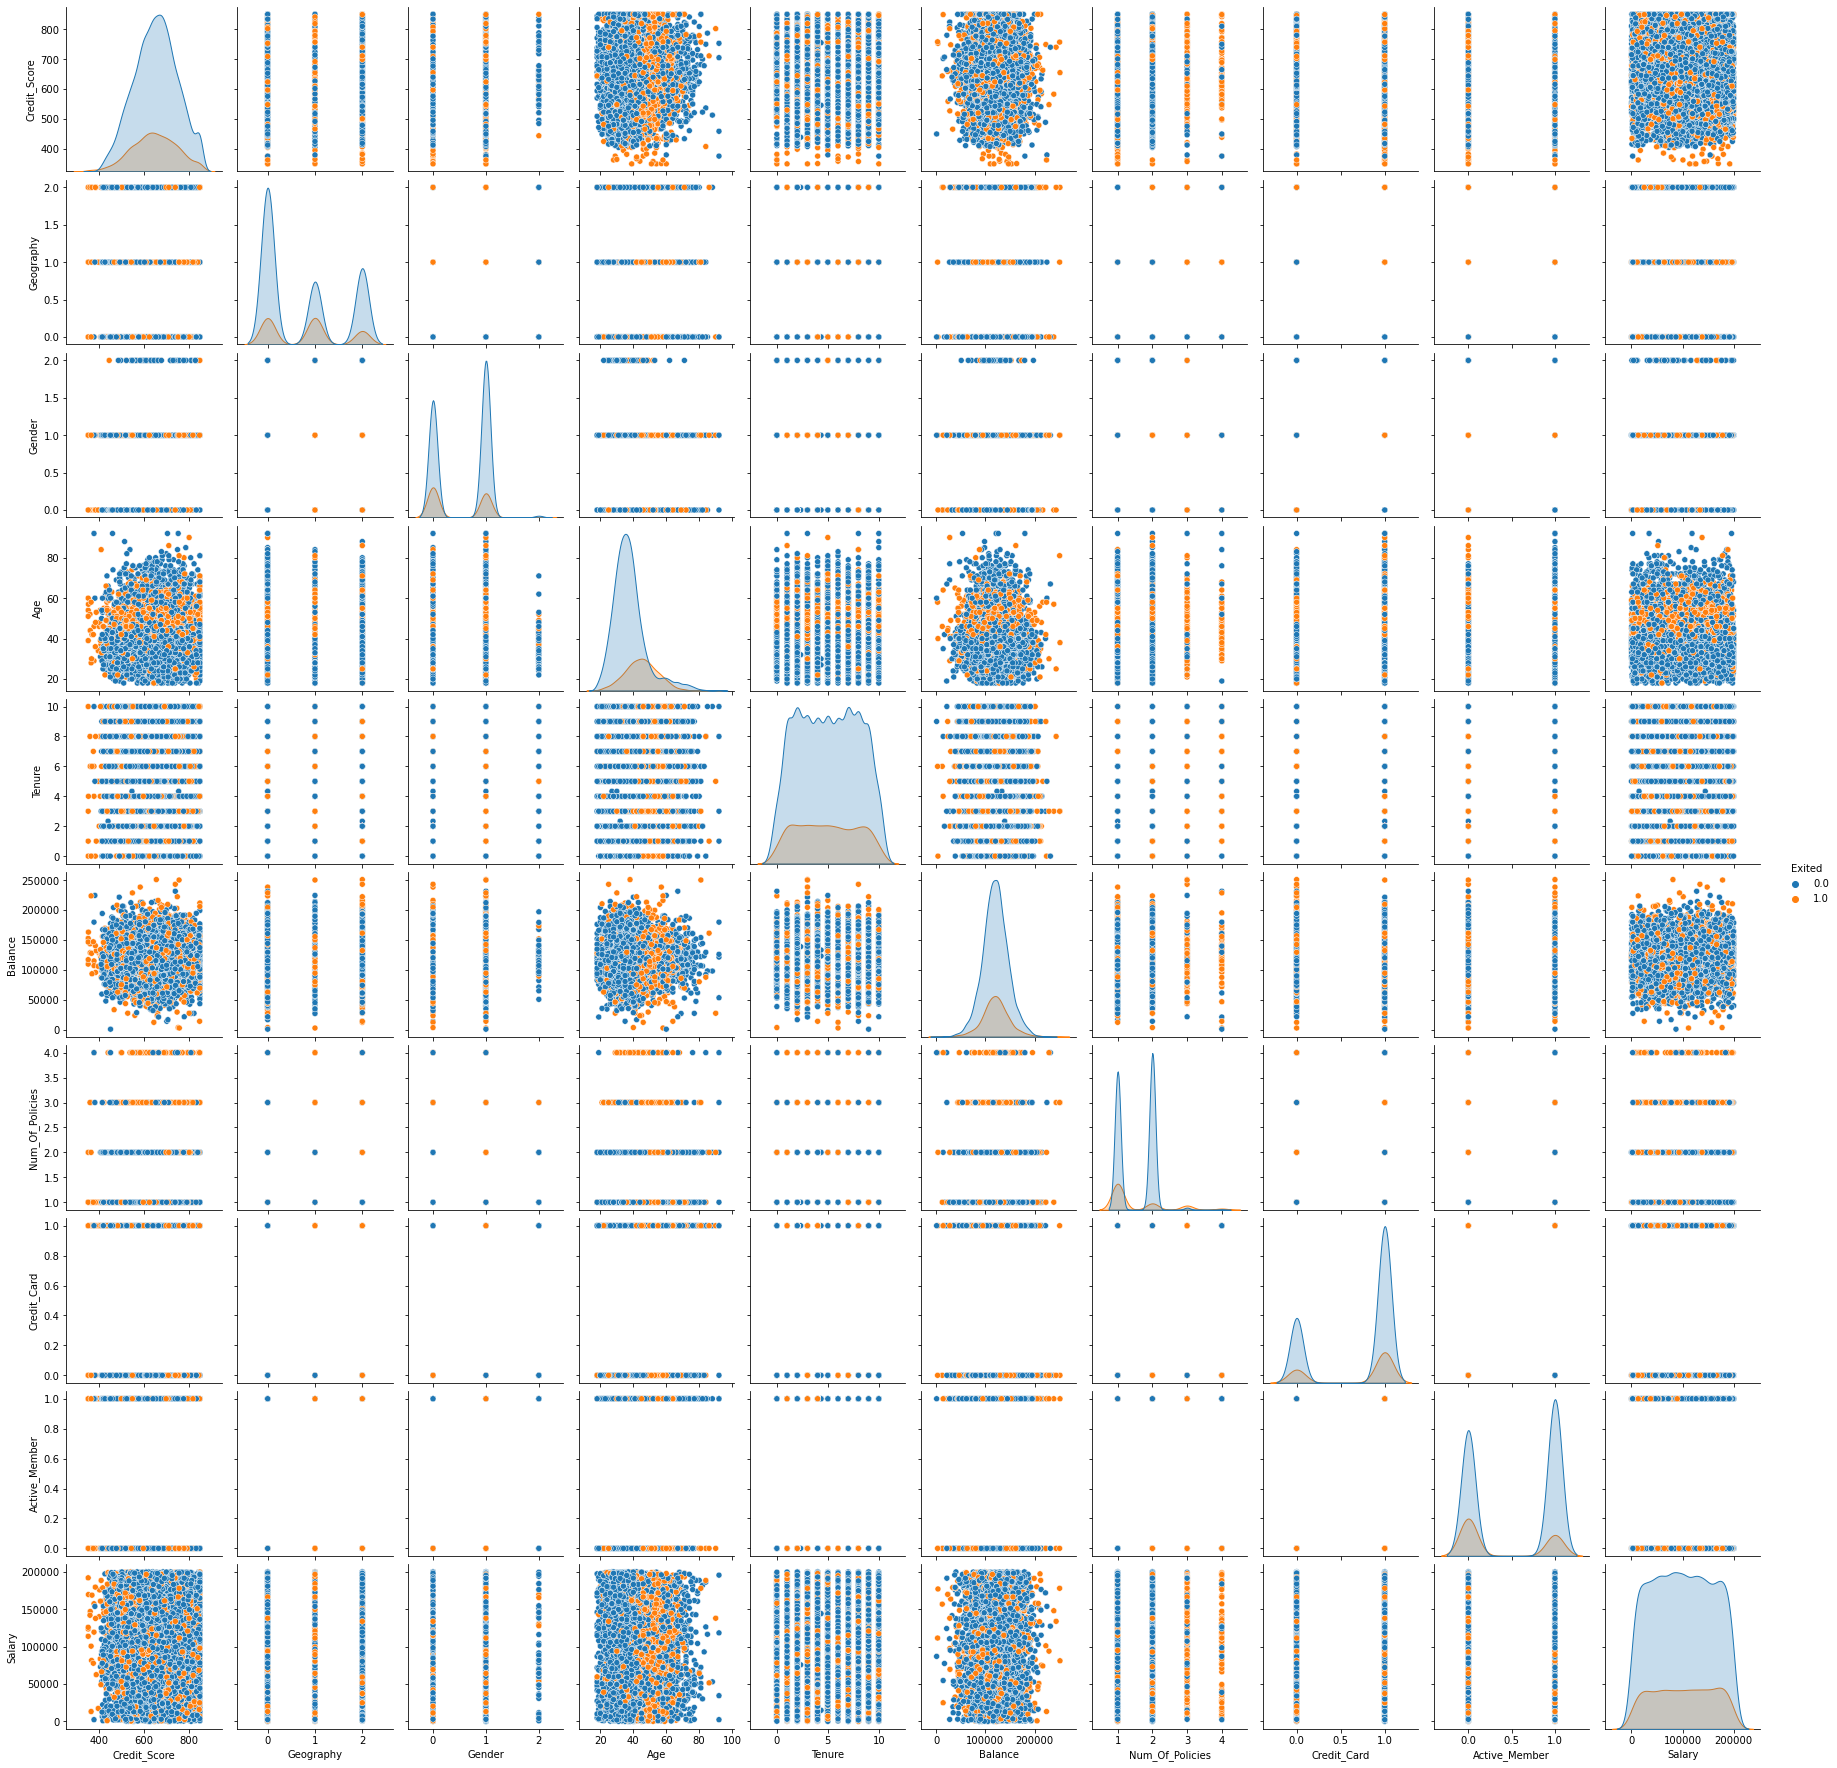

In [45]:
sns.pairplot(df,hue="Exited")

* 1. From above regplots we can say that there is lot of overlapping so there are vary less chances that logistic regression will work properly as it may have so much errrors and accurcay will be low.
* 2. 